# Predicting House Prices

On this notebook we will perform:

- Exploratory Data Analysis (EDA)
- Guide on house_prices_prediction Dataset available on Kaggle.
- Feature Analysis
- Predictions on house prices
- Perform a GridSearch for improving our model
    
Our dependent variable it is **SalePrice**. It's the property's sale price in dollars.

## Import Libraries

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import math

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

**Let's make a function to help categorize the data**

In [356]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if train[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

## Import Datasets

In [357]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Let's create a list with our datasets to make it more easy to change both
combine = [train, test]

In [358]:
for dataset in combine:
    print(f'Data: {dataset.shape}')

Data: (1460, 81)
Data: (1459, 80)


## Inicial glances about the data

In [359]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [360]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [361]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [362]:
categorical,numerical = categorize(train.columns)

The numerical features ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']:
The categorical features ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '

In [363]:
print(f'We have {len(categorical)} categorical features')
print(f'We have {len(numerical)} numerical features')

We have 43 categorical features
We have 38 numerical features


**Inicial observations:**

There are 81 features and 1460 instances for train dataset and 80 features and 1459 instances for test dataset

- There are missing values
- We might have some outliers, we will have to look deeper
- Since there are a lot of features, a feature analysis it's very important

# Exploratory Data Analysis (EDA)

**Let's take a deeper look on our dependent variable**

<AxesSubplot:>

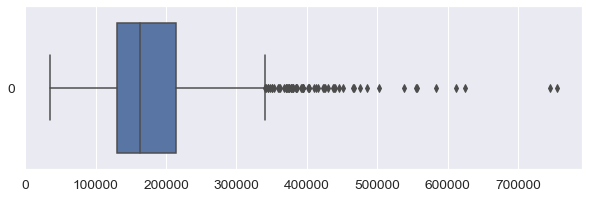

In [364]:
plt.figure(figsize=(10,3))
sns.boxplot(data = train['SalePrice'], orient='horizontal')

C:\Users\artur\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



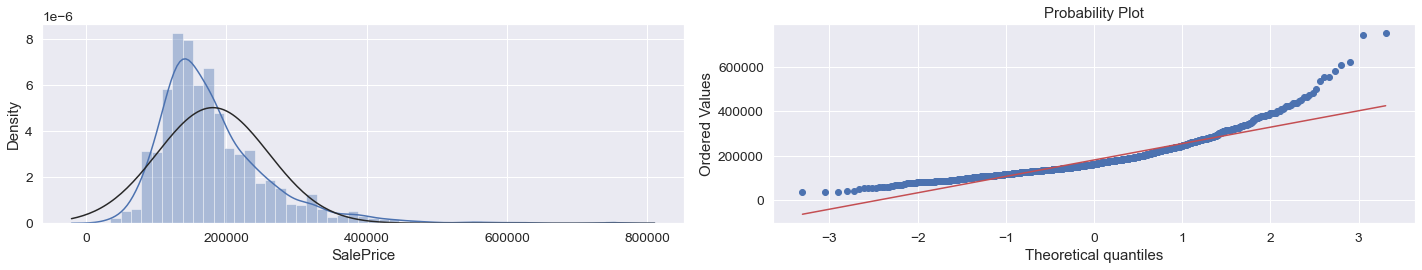

In [365]:
#histogram and normal probability plot

plt.figure(figsize=(20,7))

plt.subplot(2, 2, 1)
sns.distplot(train['SalePrice'], fit=norm);

plt.subplot(2, 2, 2)
res = stats.probplot(train['SalePrice'], plot=plt)

plt.tight_layout()

**The target variable is not normal distributed and it's right skewed**

## Numerical Features

In [366]:
# Let's separate our numerical features on discrete and continuous variables for better visualization
discrete = ['OverallQual', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
continuous = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

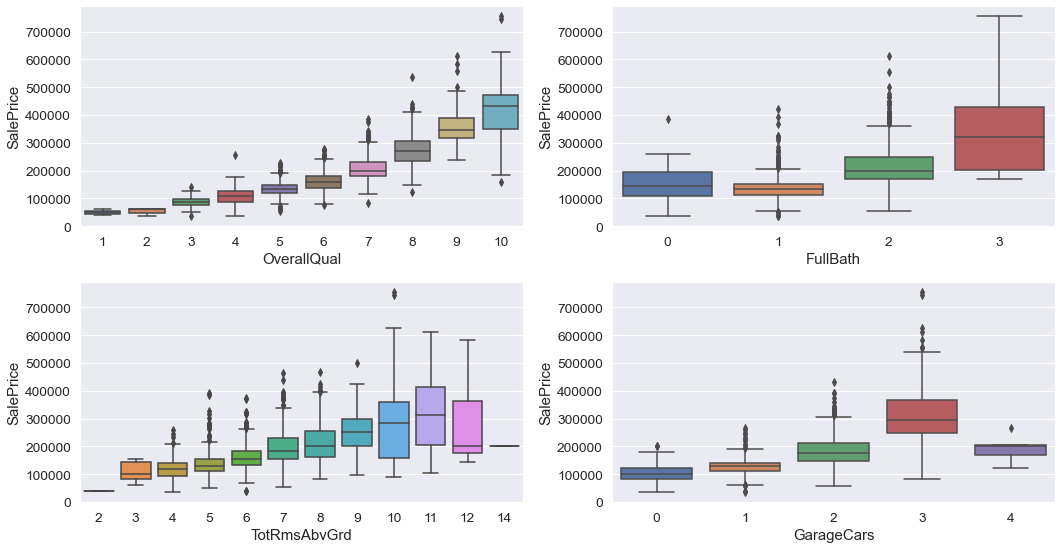

In [367]:
plt.figure(figsize=(15,15))
j =1
for i in discrete:
    plt.subplot(len(discrete),2,j)
    sns.boxplot(x=i, y='SalePrice', data=train)
    j =j+1
plt.tight_layout()

As expected:
- The higher the quality the more expensive the house
- The higher the total rooms the more expensive the house, except when there are more than 12 rooms
- Not necessarily more bathrooms mean more expensive houses
- Garages have a positive correlation with price, except when there are more than three

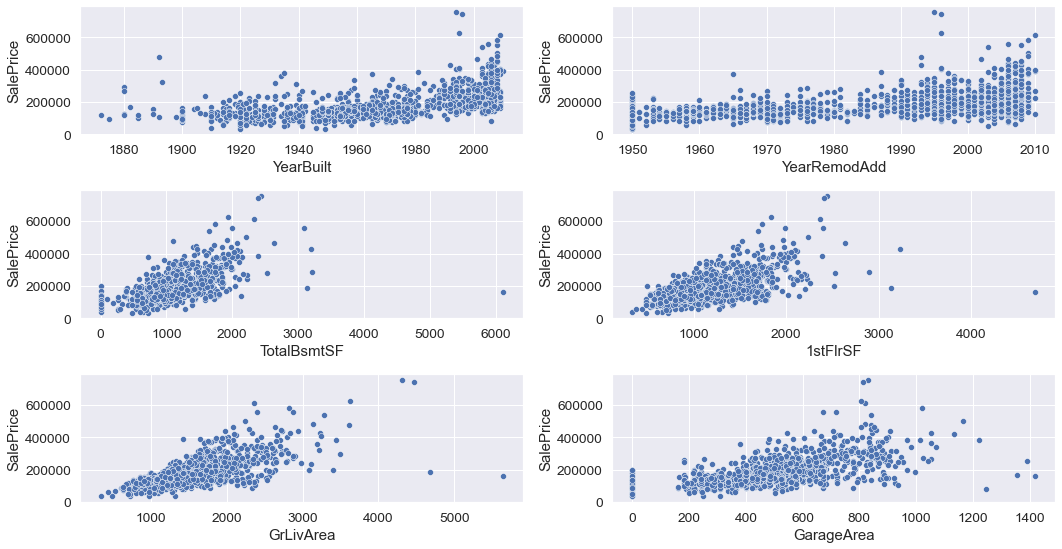

In [368]:
plt.figure(figsize=(15,15))
j =1
for i in continuous:
    plt.subplot(len(continuous),2,j)
    sns.scatterplot(x=i, y='SalePrice', data=train)
    j =j+1
plt.tight_layout()

- We can see that there are correlation with price between most variables
- There are visible outliers on data

**And finally let's check on the heatmap with correlations between variables**

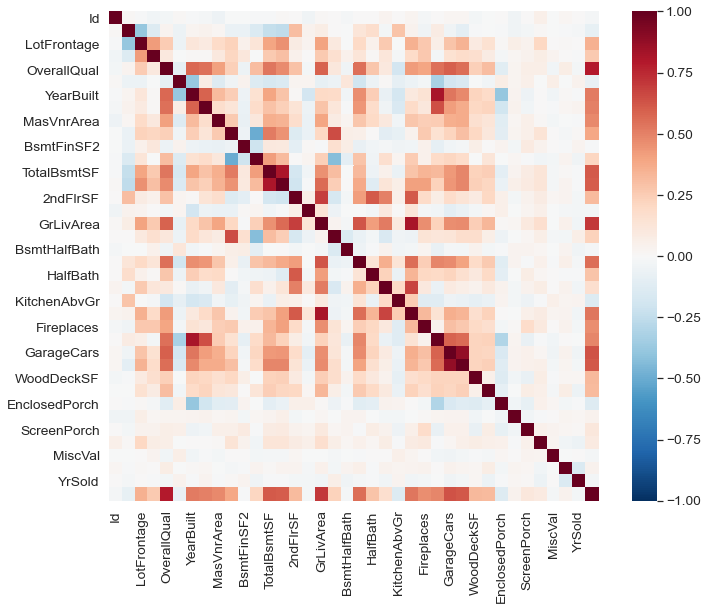

In [369]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, cmap='RdBu_r',square=True);

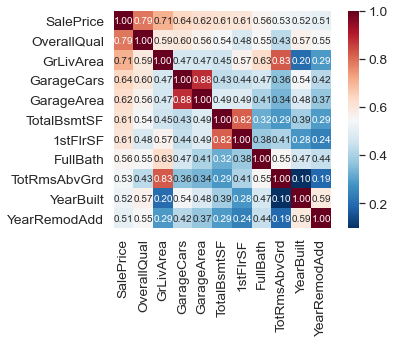

In [370]:
# Since there are a lot of variables, let's only select our 10 highest correlations with price
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='RdBu_r')
plt.show()

## Feature Engineering

For this exercise I want you to ask yourself:

What are we looking for when we are searching for a house?

Answer that question in your head then visualize all variables and think how can we modify then to achieve our goal.

In [371]:
# For this dataset there are a lot of combinations to improve the variables, I will only do one of them.
# Let's create the total square foot of the living area, adding all areas separately.
# Let's create the total bathrooms in the house, consider that a half bath it's half of full bath.
# We then create some variables to indicate if the house have pool or basement.
# And finally we change some numerical variables that should be categorical variables.
 
for dataset in combine:
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
    dataset['Total_Bathrooms'] = (dataset['FullBath'] + (0.5 * dataset['HalfBath']))
    
    dataset['haspool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['hasbsmt'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)
    dataset['OverallCond'] = dataset['OverallCond'].astype(str)

# Preprocessing 

## Missing Data

In [372]:
# We'll consider that when more than 20% of the data is missing, we should delete the corresponding variable and pretend it never existed.
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479
GarageType,81,0.055479


In [373]:
# Let's drop the missing data
for dataset in combine:
    dataset.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1 ,inplace=True)

In [374]:
# There are a lot of ways to fill the missing data
# On this simples example we will just fill the categorical by the mode and the numerical by the mean

for dataset in combine:
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    for i in (missing_data[missing_data['Total'] >= 1]).index:
        if i in numerical:
            dataset[i].fillna(dataset[i].median(), inplace=True)
        else:
            dataset[i].fillna(dataset[i].mode()[0], inplace=True)

## Outliers

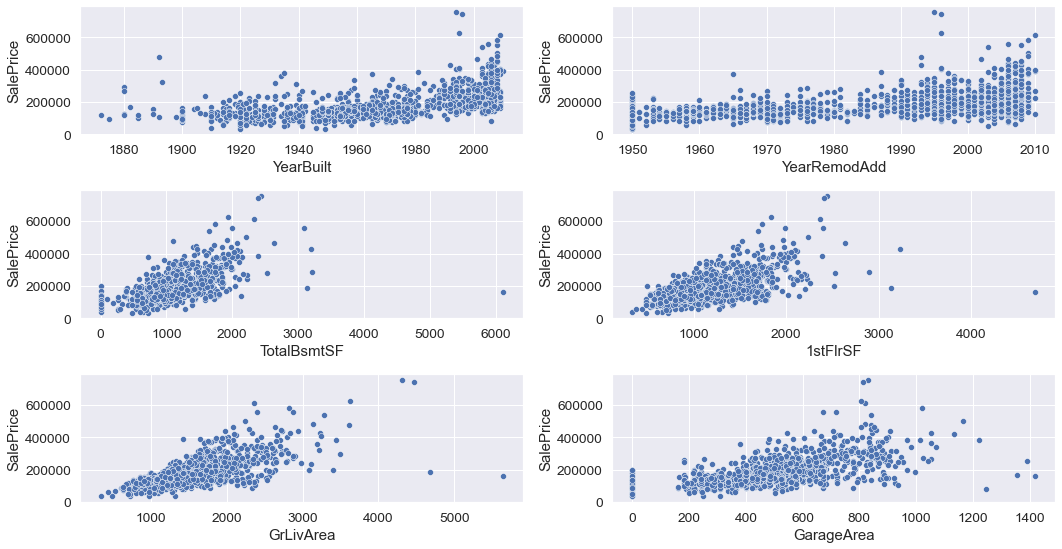

In [375]:
plt.figure(figsize=(15,15))
j =1
for i in continuous:
    plt.subplot(len(continuous),2,j)
    sns.scatterplot(x=i, y='SalePrice', data=train)
    j =j+1
plt.tight_layout()

**We can see that some values don't follow the distribution, we will identify and exclude this values**

In [376]:
# Identifying outliers
train.loc[(train['GrLivArea'] > 4500) & (train['TotalBsmtSF'] > 5000) & (train['1stFlrSF'] > 3500)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,haspool,hasbsmt
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,1,2008,New,Partial,160000,11752,2.5,1,1


In [377]:
# Excluding outliers
train=train.loc[(train['GrLivArea'] < 4500) & (train['TotalBsmtSF'] < 5000) & (train['1stFlrSF'] < 3500)]

## Transformations

In [378]:
# Since our dependent variable are not normal distributed, let's perform a log transformation

train.loc[:, 'SalePrice'] = train.loc[:, 'SalePrice'].apply(lambda x: np.log1p(x))

In [379]:
categorical,numerical = categorize(train.columns)

The numerical features ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF', 'Total_Bathrooms', 'haspool', 'hasbsmt']:
The categorical features ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitche

In [380]:
train['SalePrice'].values

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

We can see that our target variable is now transformed

**On this example we will use a Pipeline to transform the data.**

- OneHotEncoder for categorical variables
- StandardScaler for numerical variables

In [381]:
# Transformação onehot
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [382]:
# StandardScaler
numTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

## Lets define our variables and define the transformations on our data

In [383]:
# Let's define our dependent and independent variables
x = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

In [384]:
# defining the numerical and the categorical variables

numFeatures = x.select_dtypes(include=['int64', 'float64']).columns

catFeatures = x.select_dtypes(include=['object']).columns

In [385]:
# defining our preprocessor for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numTransformer, numFeatures),
        ('categoric', catTransformer, catFeatures)
    ])

## Model Predictions

Here we are going to set the models that we want use and the parameters we want to adopt. In this notebook I will use:

- Decision Tree Regressor
- RandomForest Regressor
- Support Vector Regressor (SVR)
- Linear Regressor
- XGB Regressor
- Lasso Regressor
- Ridge Regressor
- ElasticNetCV

In [386]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,haspool,hasbsmt
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,12.247699,2566,2.5,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,12.109016,2524,2.0,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,12.317171,2706,2.5,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,11.849405,2473,1.0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,12.429220,3343,2.5,0,1


In [387]:
# lets create a list to store our metric and model values
acc = []
regressors = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    XGBRegressor(),
    Lasso(),
    Ridge(),
    ElasticNetCV(max_iter=10000)
]

In [388]:
# set a seed
np.random.seed(41)

for regressor in regressors:
    
    estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # in this example, since we don't have much data, we will perform cross validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=41)
    results = math.sqrt(np.mean(-cross_val_score(estimator, x, y, scoring='neg_mean_squared_error', cv=kfold)))
    acc.append([regressor.__class__.__name__, results])

In [389]:
acc.sort(key = lambda y:y[1], reverse=False)
acc = pd.DataFrame(data = acc, columns=['model', 'RMSE'])

In [390]:
acc.head(len(regressors))

,model,RMSE
0,ElasticNetCV,0.111070
1,Ridge,0.115495
2,LinearRegression,0.124448
3,XGBRegressor,0.136660
4,RandomForestRegressor,0.140977
5,SVR,0.147358
6,DecisionTreeRegressor,0.205371
7,Lasso,0.399697


**We can see that ElasticNetCV it is our best model**

## Improving our model

Let's perform a GridSearch in order to find the best parameters on our model

In [391]:
# we set our pipeline with a random state for reproducibility
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', ElasticNetCV(random_state=41, max_iter=10000)
                       )])

In [392]:
# let's set our parameters for the gridsearch
params = {
        'model__l1_ratio': np.arange(0.1, 1.05, 0.05),
         }

In [393]:
# let's perform the gridsearch on our model
kfold = KFold(n_splits=5, shuffle=True, random_state=41)
estimator = GridSearchCV(pipe, param_grid=params, scoring='neg_mean_squared_error', cv=kfold)
estimator.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=41, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrS...
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('model',
                                        ElasticNetCV(max_iter=1

In [394]:
# find the best parameter
estimator.best_params_

{'model__l1_ratio': 1.0000000000000004}

In [398]:
# define the best parameter on our model
estimator = ElasticNetCV(l1_ratio=1)

In [399]:
# train the model again
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', estimator)
])
model.fit(x, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'H...
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      d

In [400]:
print(f'The RMSE with the GridSearch is: {math.sqrt(np.mean(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=kfold)))}')

The RMSE with the GridSearch is: 0.11079000697649241


**We can see that the model had a little improvement and it's ready for submission**